# Regression Exercise 2
In this exercise you will explore two ways of dealing with overfitting --- the first, model selection (one that you have explored before), and the second, regularization.
For this we will use synthetic data and try to fit a polynomial to this data using regression.

## Creating the Data
Run the following code to create the data. This creates a synthetic dataset by adding some random Gaussian noise to a sinusoidal function. Note we used a specific seed so that the generated data would be identical in all runs.

Note: in this exercise you should **use the test set as a validation set**, as we will not care about reporting an approximation for the generalization error of our model.

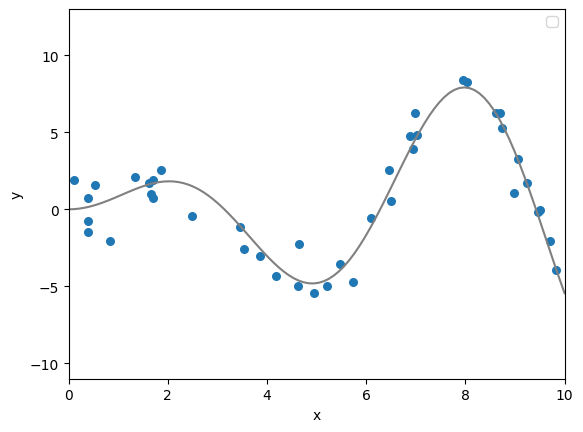

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def f(x):
    return x * np.sin(x)

def plot_fit(ax, X_train=None, y_train=None, model=None, label=None):
  min_x, max_x = np.floor(min(X_train)), np.ceil(max(X_train))
  x_range = np.linspace(min_x, max_x, 100)
  y = f(x_range)
  min_y, max_y = np.floor(min(y))-5, np.ceil(max(y))+5
  ax.plot(x_range, y, color='gray')
  if X_train is not None and y_train is not None:
    ax.scatter(X_train, y_train, s=30)
  if model is not None:
    ax.plot(x_range, model.predict(x_range), color='red', label=label)
  ax.set_ylim((min_y, max_y))
  ax.set_xlim((min_x, max_x))
  ax.set_ylabel('y')
  ax.set_xlabel('x')
  ax.legend(loc='upper right')

def create_data(n_samples = 60, test_size=0.3, min_x=0, max_x=10, err_scale=1):
  np.random.seed(9)
  X = np.random.uniform(min_x, max_x, size=n_samples)[:, np.newaxis]
  S = np.random.normal(loc=0, scale=err_scale, size=n_samples)[:, np.newaxis] # loc is mean, and scale is std
  y = f(X) + S
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  return X_train, X_test, y_train, y_test

# generate data
X_train, X_test, y_train, y_test = create_data()
plot_fit(plt.gca(), X_train, y_train)

## Polynomial Regression - Model Selection

**Questions:**
1. Apply polynomial regression to the data, using polynomials with maximal degree of 0 to 11.  **Hint:** Use *sklearn.preprocessing.PolynomialFeatures* and *sklearn.linear_model.LinearRegression*.
2. Plot the fitted polynomial against the training data and the underlying generating function (that is, for each fitted polynomial, plot that polynomial on top of a graph similar to the one plotted above) using the `plot_fit` function above.
3. Do you see underfitting or overfitting? Which is the best degree for this model?
4. Apply model selection technique by choosing the polynomial degree hyperparameter that gives minimum mean squared error on the test data.  
 - **Hint:** Use *sklearn.metrics.mean_squared_error*.
 - Plot: mean squared error as a function of polynomial degree both for `train` and `test` sets.  Put on the plot also the minimal mean squared error of the `test` set.
 - Explain your results.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso

In [3]:
#1.
degree = 11
models = []
y_preds_test = []
y_preds_train = []
for i in range(degree +1):
  model = make_pipeline(PolynomialFeatures(i), LinearRegression())
  model.fit(X_train,y_train)
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models.append(model)
  y_preds_test.append(y_pred_test)
  y_preds_train.append(y_pred_train)






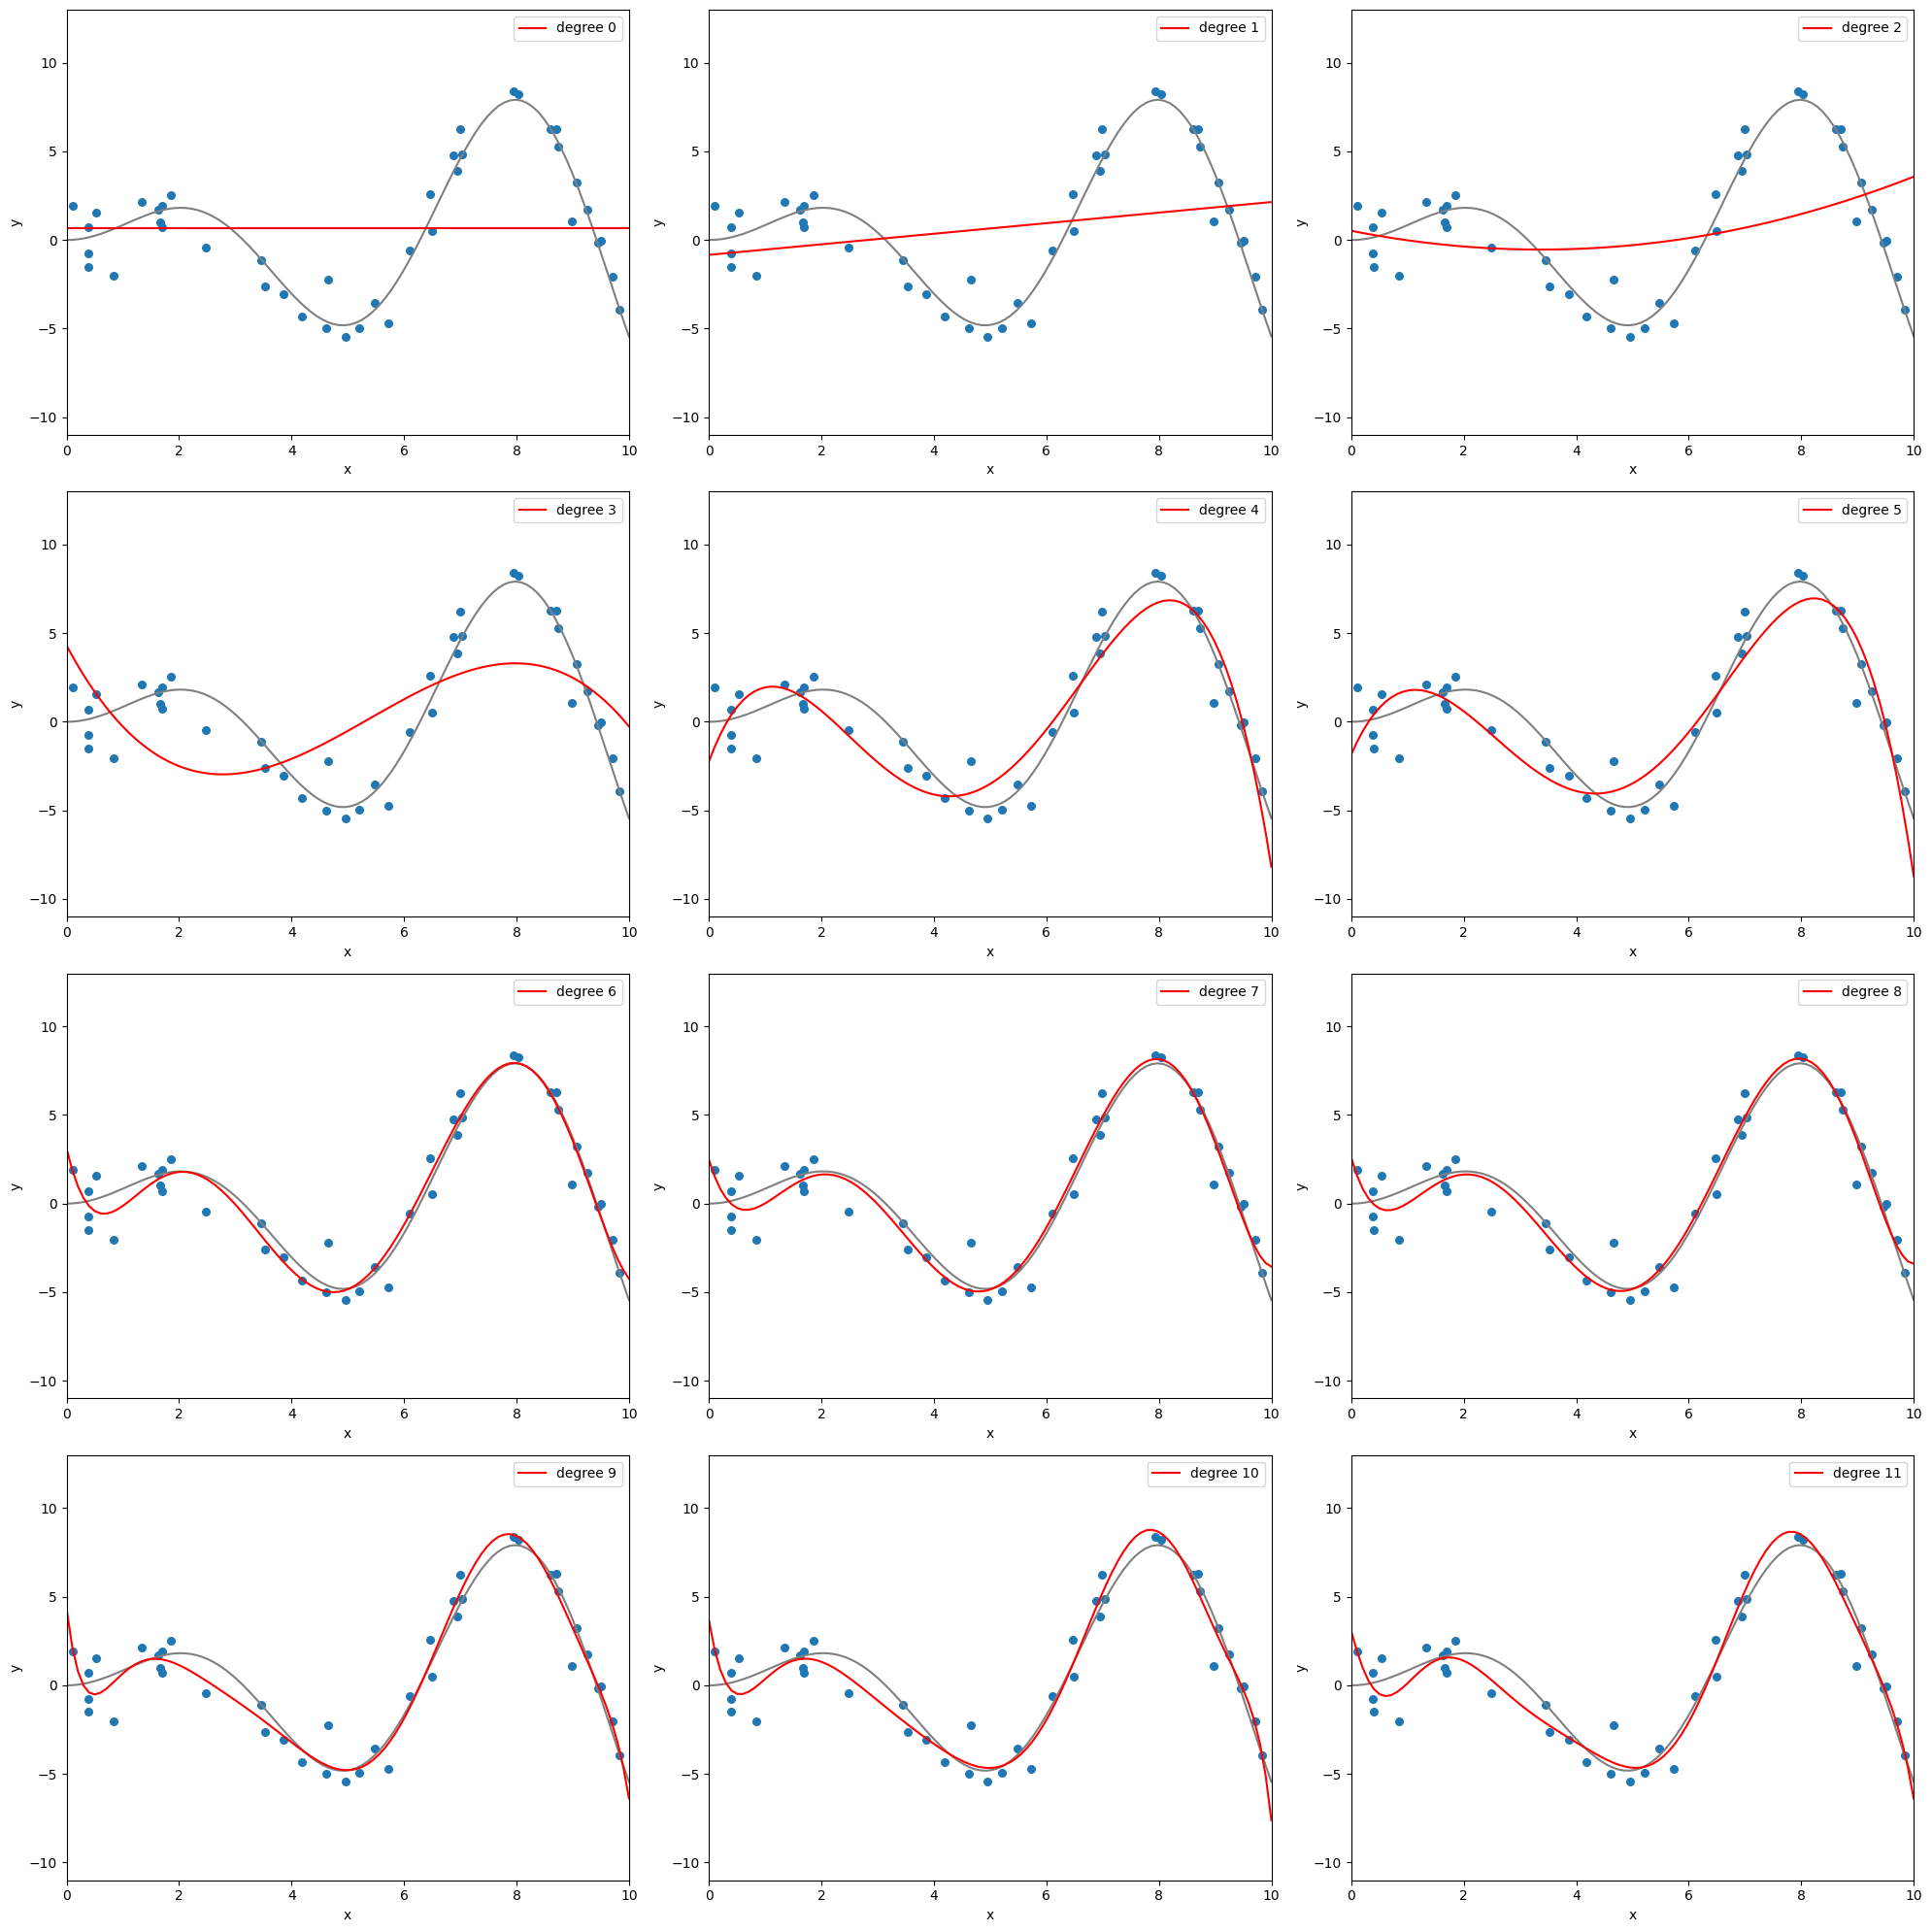

In [4]:
#2.
fig, axes = plt.subplots(4,3,figsize = (20,20))
axes = axes.flatten()
for degree,ax in enumerate(axes):
  plot_fit(ax, X_train,y_train,models[degree], label = f'degree {degree}')

plt.tight_layout()
plt.show()

3.

For degrees between 0 and 5, we can see underfitting.

For degrees between 8 and 11, we can see overfitting.

Degree = 7 seems to best the most appropriate to the model.

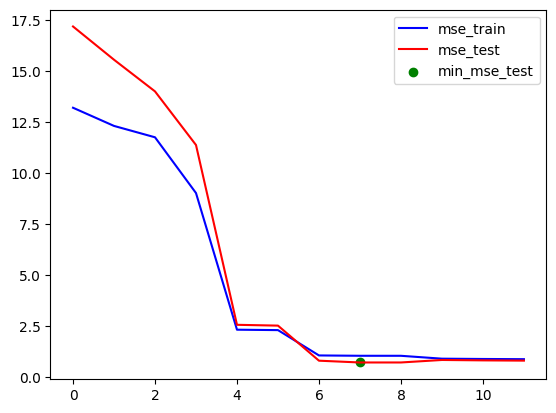

In [5]:
#4.
mse_train = []
mse_test = []
degree = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in range(len(y_preds_test)):
  mse_test.append(mean_squared_error(y_test,y_preds_test[i]))
  mse_train.append(mean_squared_error(y_train,y_preds_train[i]))


min_mse_index = mse_test.index(min(mse_test))
plt.plot(degree,mse_train,color = 'blue', label = 'mse_train')
plt.plot(degree,mse_test,color = 'red', label = 'mse_test')
plt.scatter(degree[min_mse_index],mse_test[min_mse_index], color = 'green', label = 'min_mse_test')

plt.legend()
plt.show()

Overall, we can see that we have a lower mse for train set than for test set due to the fact that we are fitting our data on the train set.

For degrees between 0 and 4, we have a high mse as we are underfitting our data as we saw on the previous graph.

For degrees > 7, we see that our mse is increasing as we are overfitting our model.

For degree = 7, the mse of the test set is the lowest.

## Polynomial Regression - Regularization
Now, instead of choosing the best maximal degree to use, we will use polynomial regression with regularization.

**Questions:**
4. Apply polynomial ridge regression with polynomial degree 11, using different regularization parameters (also test the case where the regularization parameter equals 0).
  - For this task you should use L2-norm regularization (ridge regression), which uses the sum of squared parameters as the regularization term (as we saw in class). That is,
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_2
$$
where $\alpha$ is the regularization parameter, $\boldsymbol\theta$ is the vector of coefficients including the intercept term and $\mathbf{x}_i$ is the vector of the predictors of the i-th data point including a constant predictor for the intercept.
  - **Hint:** Use *sklearn.linear_model.Ridge* with parameter *alpha=...*
  - Try using `alpha` values between 0 and 1000 and find the best alpha parameter with smallest MSE on `test` set
  - Again, plot the fitted polynomial against the training data and the underlying generating function.
  - This time, also plot the coefficients of the fitted polynomial on a separate plot. **Hint:** You can sort the coefficients to easier compare which model left smaller or large coefficients.  

5. What is the main difference between regularization and model selection approaches? What would be the best regularization parameter to use in this case? Compare your results with the model selection approach for overcoming the the problem of overfitting.

6. Compare the above results with L1-norm regularization (LASSO) instead of the L2-norm, that is
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_1
$$
> **Hint**: Use *sklearn.linear_model.Lasso*.

In [6]:
#4.
ridge_models = []
y_preds_ridge_test = []
mse_ridge_test = []
alphas = [0,1,10,100,1000]
for alpha in alphas:
  ridge_model = make_pipeline(PolynomialFeatures(11), Ridge(alpha = alpha))
  ridge_model.fit(X_train,y_train)
  y_pred = ridge_model.predict(X_test)
  y_preds_ridge_test.append(y_pred)
  ridge_models.append(ridge_model)
  mse_ridge_test.append(mean_squared_error(y_test,y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.14671e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.81063e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.21108e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.25958e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [7]:
min_mse_index_ridge = mse_ridge_test.index(min(mse_ridge_test))

In [8]:
alphas[min_mse_index_ridge]

10

For the chosen alphas, the optimal alpha is 10

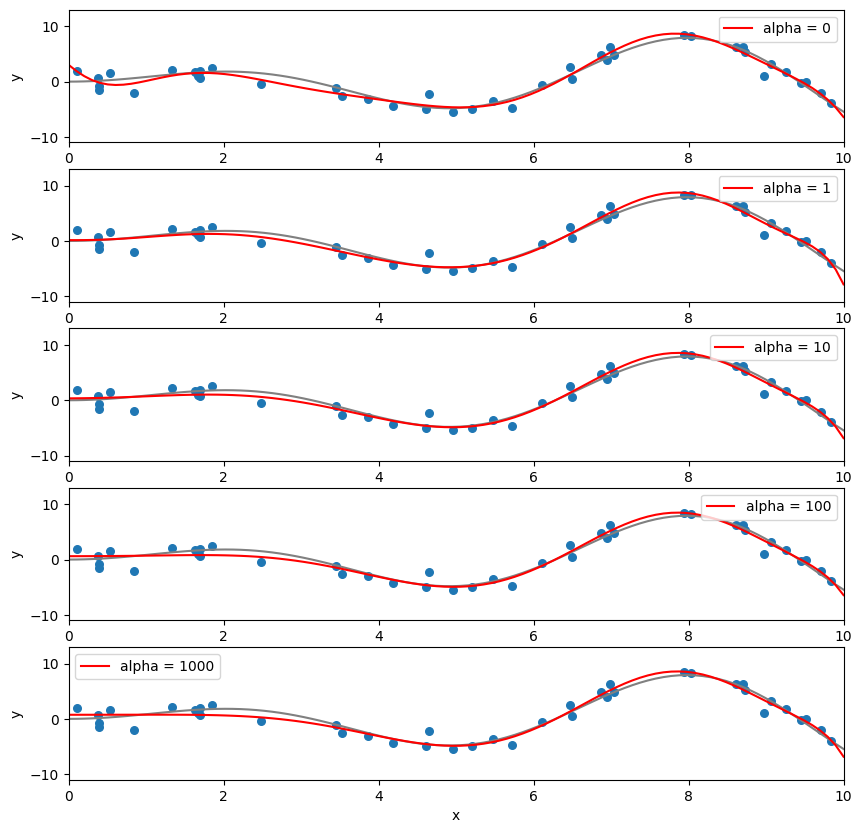

In [9]:
fig,axes = plt.subplots(5,1,figsize = (10,10))
axes = axes.flatten()
for index,ax in enumerate(axes):
  plot_fit(ax,X_train,y_train,ridge_models[index], label = f'alpha = {alphas[index]}')

plt.legend()
plt.show()

In [10]:
ridge_coeff = []
for i in range(len(ridge_models)):
  ridge_coeff.append(np.absolute(ridge_models[i].named_steps['ridge'].coef_))

In [11]:
ridge_coeff

[array([[0.00000000e+00, 1.16959055e+01, 5.23274532e+00, 1.60631820e+01,
         2.11048636e+01, 1.15466643e+01, 3.56972847e+00, 6.78506313e-01,
         8.07551311e-02, 5.86150184e-03, 2.37069260e-04, 4.09272453e-06]]),
 array([[0.00000000e+00, 7.99382432e-02, 4.56543461e-01, 4.46681717e-01,
         8.43662024e-02, 3.73892171e-01, 2.53421542e-01, 7.66977813e-02,
         1.30840549e-02, 1.29608608e-03, 6.94253555e-05, 1.55283357e-06]]),
 array([[0.00000000e+00, 1.00277901e-01, 1.98220785e-01, 1.63850890e-01,
         1.69899167e-02, 1.41409309e-01, 8.33414772e-02, 2.39400506e-02,
         4.19027982e-03, 4.45438118e-04, 2.59380799e-05, 6.27926719e-07]]),
 array([[0.00000000e+00, 2.25377178e-02, 4.05656533e-02, 4.06713407e-02,
         1.53596771e-02, 1.71136362e-02, 6.90364664e-03, 3.77219335e-03,
         4.28365453e-04, 8.75375007e-06, 3.86019528e-06, 1.63241668e-07]]),
 array([[0.00000000e+00, 3.20480267e-03, 6.01115009e-03, 7.03230572e-03,
         4.39329807e-03, 2.20974482e-03

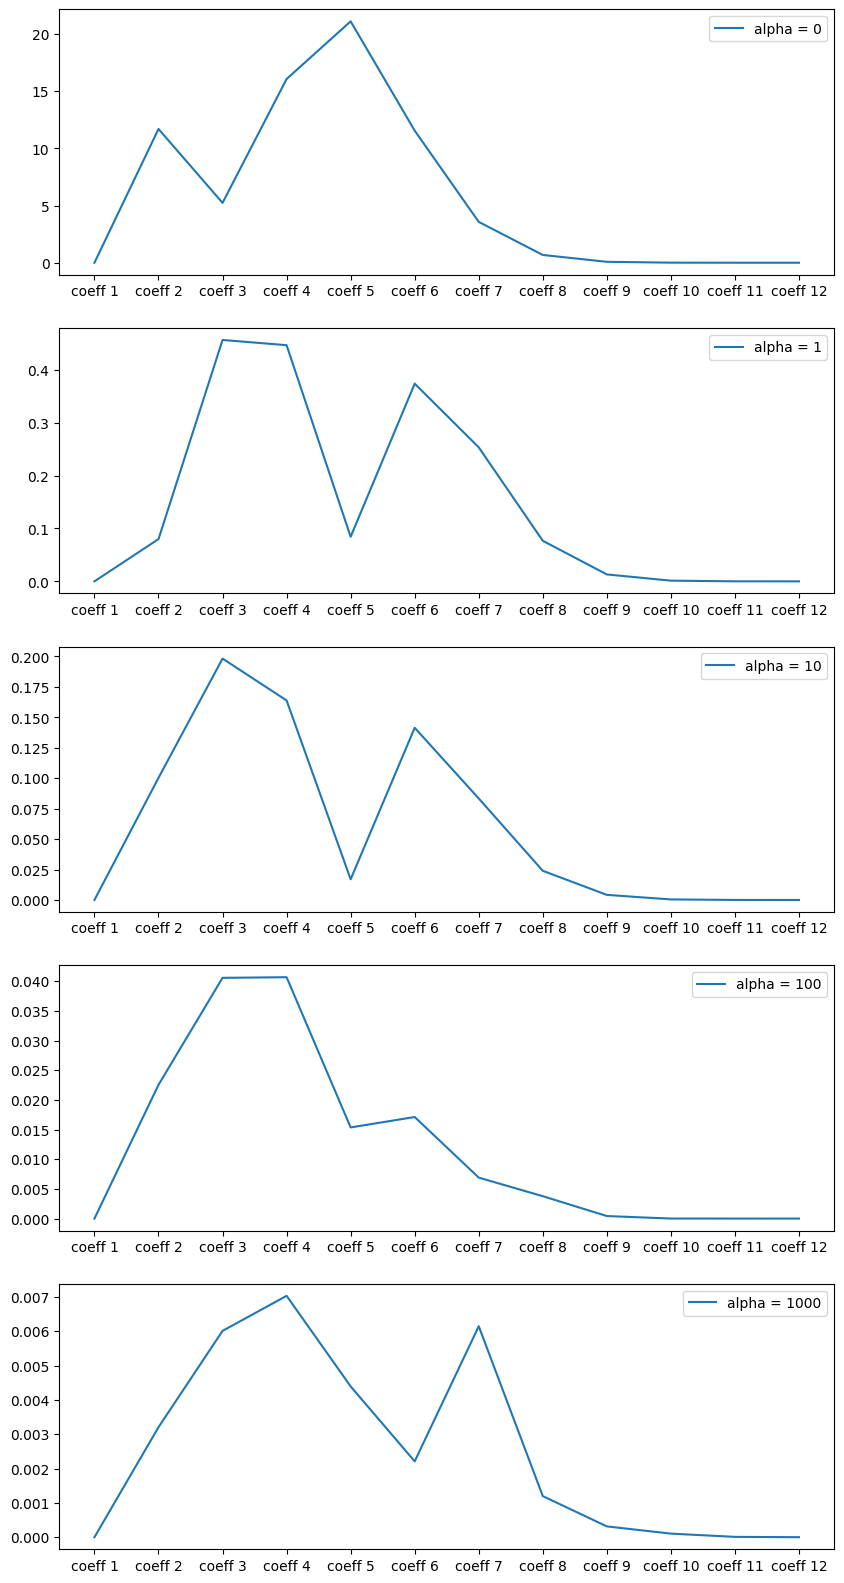

In [12]:
x = ['coeff 1','coeff 2','coeff 3','coeff 4','coeff 5','coeff 6','coeff 7','coeff 8','coeff 9','coeff 10','coeff 11','coeff 12']
fig,axes = plt.subplots(5,1, figsize =(10,20))
for index, ax in enumerate(axes):
  ax.plot(x,ridge_coeff[index][0], label = f'alpha = {alphas[index]}')
  ax.legend()
plt.show()


In [13]:
#5.
all_mse = []
for alpha in range(1000):
  poly = make_pipeline(PolynomialFeatures(11), Ridge(alpha = alpha))
  poly.fit(X_train,y_train)
  y_pred = poly.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  all_mse.append(mse)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.14671e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.81115e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44319e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.92425e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [14]:
all_mse.index(min(all_mse))

22

In [15]:
min(all_mse)

0.715773960566781

In [16]:
min(mse_test)

0.7172457915022115

On the regularization approach, we use a higher degree for our model than on the model selection approach. Then, on the regularization approach, as we overfit our data with a high degree, we use a normalization term to give weight to our features and limit overfitting.

In this case, the best regularization parameter to use would be 22.

On the model selection approach, we used a degree of 7 whereas on the regularization approach, we used a degree of 11.

For the corresponding MSE, the one we get with the Ridge regularization and the one we get with the model selection approach is quite the same.

We get 0.7157 for the regularization approach.
We get 0.7172 for the model selection approach.

In [17]:
#6.
lasso_models = []
y_preds_lasso_test = []
mse_lasso_test = []
alphas = [0,1,10,100,1000]
for alpha in alphas:
  lasso_model = make_pipeline(PolynomialFeatures(11), Lasso(alpha = alpha))
  lasso_model.fit(X_train,y_train)
  y_pred_lasso = lasso_model.predict(X_test)
  y_preds_ridge_test.append(y_pred_lasso)
  lasso_models.append(lasso_model)
  mse_lasso_test.append(mean_squared_error(y_test,y_pred_lasso))


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.472e+01, tolerance: 5.549e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

In [18]:
min_index_mse_lasso = mse_lasso_test.index(min(mse_lasso_test))

In [19]:
alphas[min_index_mse_lasso]

1

For the chosen alphas, the optimal alpha with lasso regularization is 1.

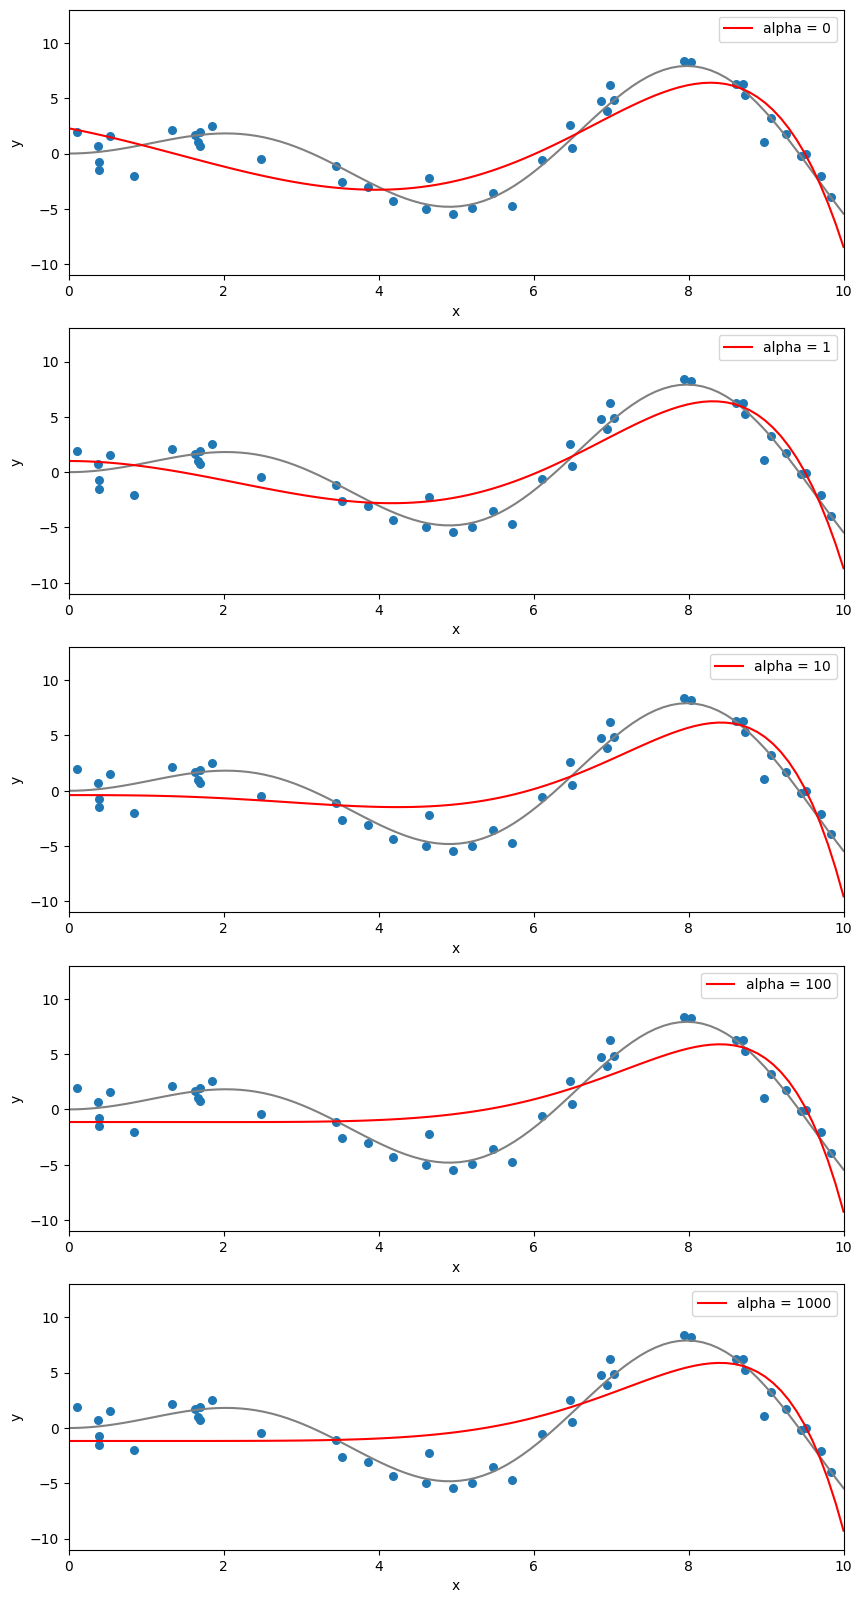

In [20]:
fig,axes = plt.subplots(5,1,figsize = (10,20))
axes = axes.flatten()
for index, ax in enumerate(axes):
  plot_fit(ax,X_train,y_train,lasso_models[index], label = f'alpha = {alphas[index]}')

plt.show()


In [21]:
lasso_coeff = []
for i in range(len(lasso_models)):
  lasso_coeff.append(np.absolute(lasso_models[i].named_steps['lasso'].coef_))

In [22]:
ridge_coeff = []
for i in range(len(ridge_models)):
  ridge_coeff.append(np.absolute(ridge_models[i].named_steps['ridge'].coef_))

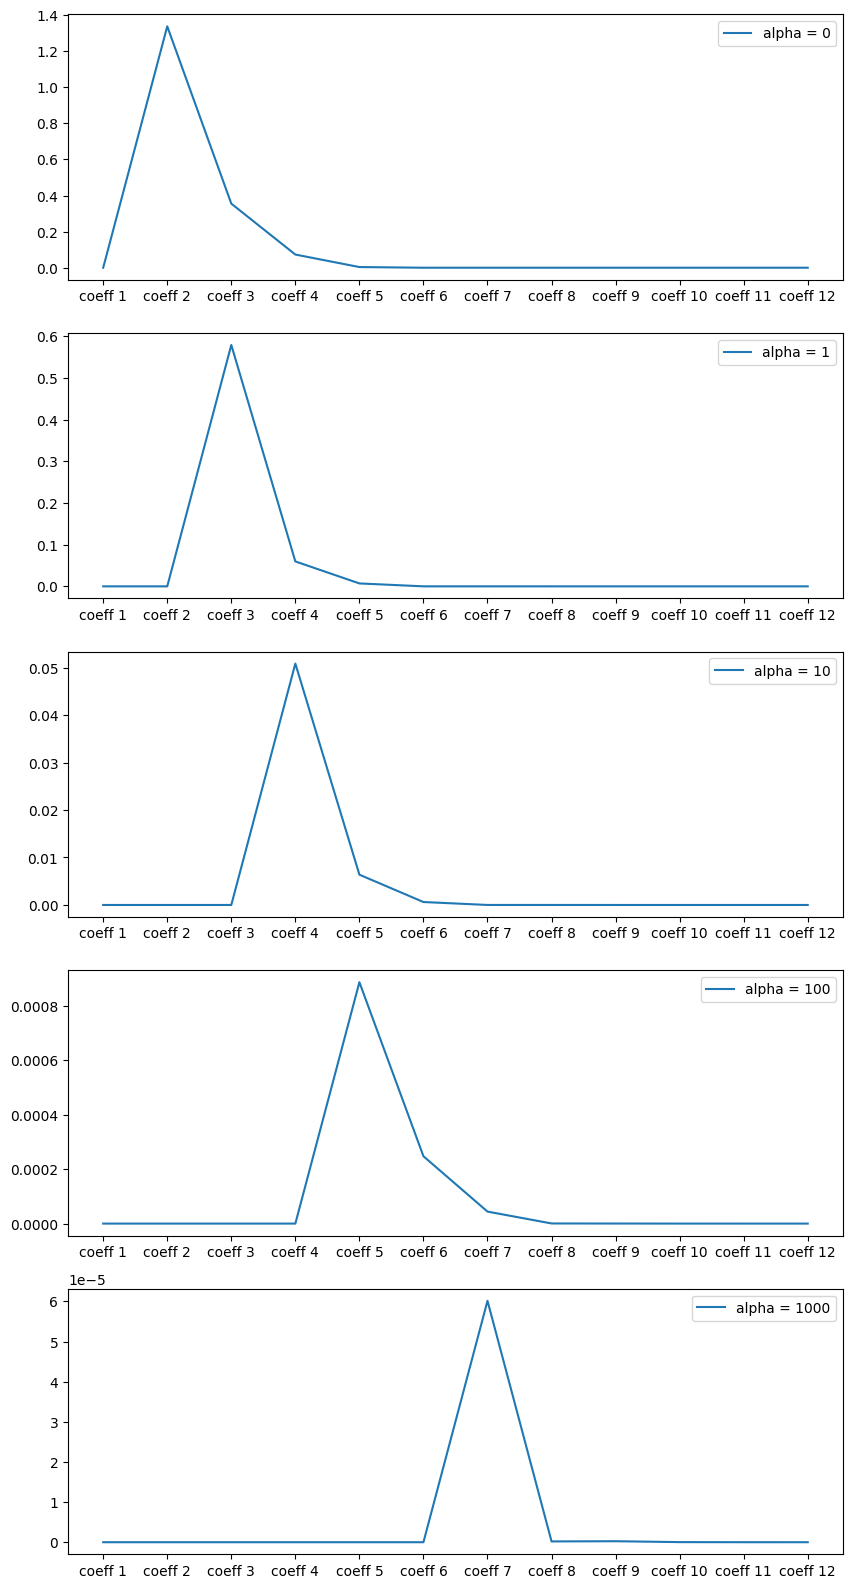

In [23]:
x = ['coeff 1','coeff 2','coeff 3','coeff 4','coeff 5','coeff 6','coeff 7','coeff 8','coeff 9','coeff 10','coeff 11','coeff 12']
f,axes = plt.subplots(5,1,figsize = (10,20))
axes = axes.flatten()
for index, ax in enumerate(axes):
  ax.plot(x, lasso_coeff[index], label = f'alpha = {alphas[index]}')
  ax.legend()

plt.show()

In [24]:
all_lasso_mse = []
for alpha in range(1000):
  lasso_model = make_pipeline(PolynomialFeatures(11), Lasso(alpha = alpha))
  lasso_model.fit(X_train,y_train)
  y_pred = lasso_model.predict(X_test)
  all_lasso_mse.append(mean_squared_error(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.472e+01, tolerance: 5.549e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

In [25]:
min_index_lasso = all_lasso_mse.index(min(all_lasso_mse))

In [26]:
min_index_lasso

1

In [27]:
all_lasso_mse[min_index_lasso]

4.289064336853891

For the Lasso regularization, the best alpha to choose would be 1 ( considering than alpha has to be an integer). We get a mse error of 4.29 which is much more higher than the one we get for ridge regularization and model selection approach.